In [24]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import math
import pylab

In [2]:
df = pd.read_excel('Output.xlsx')
df.head()

,Title,Cost:,Currency,Killometrage,Age,Location,Link
0,BMW 1 серия II (F20/F21) 116i,870000,RUB,99000,6,"Москва﻿,",https://auto.ru/cars/used/sale/bmw/1er/1096643...
1,BMW 1 серия I (E81/E82/E87/E88) Рестайлинг 116i,470000,RUB,146000,10,"Москва﻿,",https://auto.ru/cars/used/sale/bmw/1er/1097628...
2,BMW 1 серия I (E81/E82/E87/E88) Рестайлинг 135i,800000,RUB,114000,10,"Москва﻿,",https://auto.ru/cars/used/sale/bmw/1er/1097749...
3,BMW 1 серия II (F20/F21) 116i,600000,RUB,62000,8,"Москва﻿,",https://auto.ru/cars/used/sale/bmw/1er/1097894...
4,BMW 1 серия II (F20/F21) Рестайлинг 2 118i,1165000,RUB,49212,3,"Москва﻿,",https://auto.ru/cars/used/sale/bmw/1er/1097890...


In [3]:
df.describe()

,Cost:,Killometrage,Age
count,4.180000e+02,418.000000,418.00000
mean,6.460764e+05,128693.607656,9.12201
std,2.984609e+05,53008.152334,3.06476
min,2.700000e+05,1000.000000,1.00000
25%,4.500000e+05,95625.000000,8.00000
50%,5.550000e+05,130050.000000,9.00000
75%,7.000000e+05,165901.250000,12.00000
max,2.999999e+06,293000.000000,15.00000


In [34]:
def qq_plot(df, x, y):
    b1, b0, rv, p, stderr= stats.linregress(x=df[x], y=df[y])
    y_pred = []
    for index,row in df.iterrows():
        y_pred.append(b0+ b1*row[x])

    ostatki = df[y]- y_pred
    stats.probplot(ostatki, dist="norm", plot=pylab)

<b>Диапазон цен на топ 5 наиболее популярных моделей</b>

In [31]:
if len(df.Title.value_counts() > 4):
    top_5 = df.Title.value_counts()[0:5].index
else:
    top_5 = list(set(df.Title))
top_5

Index(['BMW 1 серия  I (E81/E82/E87/E88) Рестайлинг 116i',
       'BMW 1 серия  II (F20/F21) 116i',
       'BMW 1 серия  I (E81/E82/E87/E88) Рестайлинг 118i',
       'BMW 1 серия  II (F20/F21) 118i',
       'BMW 1 серия  II (F20/F21) Рестайлинг 2 118i'],
      dtype='object')

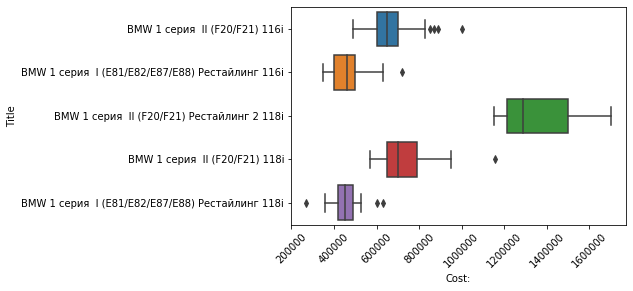

In [32]:
df_bx = df[df.Title.isin(top_5)]
ax = sns.boxplot(x="Cost:", y="Title", data=df_bx)
for label in ax.get_xticklabels():
        label.set_rotation(45)

Title: BMW 1 серия  I (E81/E82/E87/E88) Рестайлинг 116i
Pirson Correlation Coefficient: -0.5254218385617382
R squared value: 0.27606810843759727 - impact of km on cost
P-value: 1.3660873033287948e-11 - REGRESSION IS SIGNIFICANT
Each 10000 km decrease price on 8178.940573022527 RUR

Title: BMW 1 серия  II (F20/F21) 116i
Pirson Correlation Coefficient: -0.42011212300374334
R squared value: 0.17649419589471238 - impact of km on cost
P-value: 5.650636646634461e-05 - REGRESSION IS SIGNIFICANT
Each 10000 km decrease price on 9677.896577811109 RUR

Title: BMW 1 серия  I (E81/E82/E87/E88) Рестайлинг 118i
Pirson Correlation Coefficient: -0.2611143425126096
R squared value: 0.06818069986579241 - impact of km on cost
Each 10000 km decrease price on 5008.422976779297 RUR

Title: BMW 1 серия  II (F20/F21) 118i
Pirson Correlation Coefficient: -0.5792365605379989
R squared value: 0.3355149930638908 - impact of km on cost
P-value: 0.0009930090303243118 - REGRESSION IS SIGNIFICANT
Each 10000 km decreas

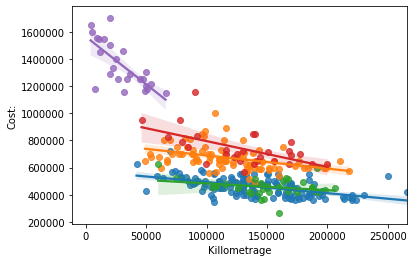

In [36]:
for index in range(len(top_5)):
    title = top_5[index]
    print(f'Title: {title}')
    df_cars = df_bx[df_bx.Title==title]
    r = np.corrcoef(x=df_cars['Killometrage'], y=df_cars['Cost:'])[0][1]
    R2 = np.corrcoef(x=df_cars['Killometrage'], y=df_cars['Cost:'])[0][1]**2
    print(f'Pirson Correlation Coefficient: {r}')
    print(f'R squared value: {R2} - impact of km on cost')
    sns.regplot(x=df_cars['Killometrage'], y=df_cars['Cost:'])
    b1, b0, rv, p, stderr= stats.linregress(x=df_cars['Killometrage'], y=df_cars['Cost:'])
    if p <= 0.05:
        print(f'P-value: {p} - REGRESSION IS SIGNIFICANT')
    if b1 < 0:
        print(f'Each 10000 km decrease price on {math.fabs(b1*10000)} RUR')
    if b1 > 0:
        print(f'Each 10000 km increase price on {b1*10000} RUR')
#     qq_plot(df_cars, x='Killometrage', y='Cost:')
    print()